# Task : Rice Leaf Disease using-CNN (Convolutional Neural Network)

The dataset contains images of rice leaf. 

There are three classes/diseases:

1- Bacterial leaf blight,

2- Brown spot, and

3- Leaf smut.

Each having 40 images totalling to 120 images. The format of all images are jpg.

# <Span style='color:red'>Problem: **As the number of images is less, their is not enough image data to train the model.**

# Domain Analysis

**1- Bacterial leaf blight** of rice is caused by Xanthomonas oryzae. Circular yellow spots present in the margin of seedlings, which enlarges and coalesce leading to drying of foliage. In growing plant, translucent lesions appear near leaf margin. Lesions enlarge and covered the whole leaf in few days. In advance stage, the entire lamina is covered by white coloured lesions. Dewdrop containing milky lesion of bacterial masses form on leaf and dry up to leave encrustation. Affected grains have discoloured spots.

**2- Brown spot** is a fungal disease that infects the coleoptile, leaves, leaf sheath, panicle branches, glumes, and spikelets. Its most observable damage is the numerous big spots on the leaves which can kill the whole leaf. When infection occurs in the seed, unfilled grains or spotted or discolored seeds are formed.

**3- Leaf smut** caused by the fungus Entyloma oryzae, is a widely distributed, but somewhat minor, disease of rice. The fungus produces slightly raised, angular, black spots (sori) on both sides of the leaves.

# CNN
**A convolutional neural network (CNN) is a type of artificial neural network used in image recognition and processing that is specifically designed to process pixel data.**

**It is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms.**

# <span style='color:brown'> How CNN works is shown in below diagram.

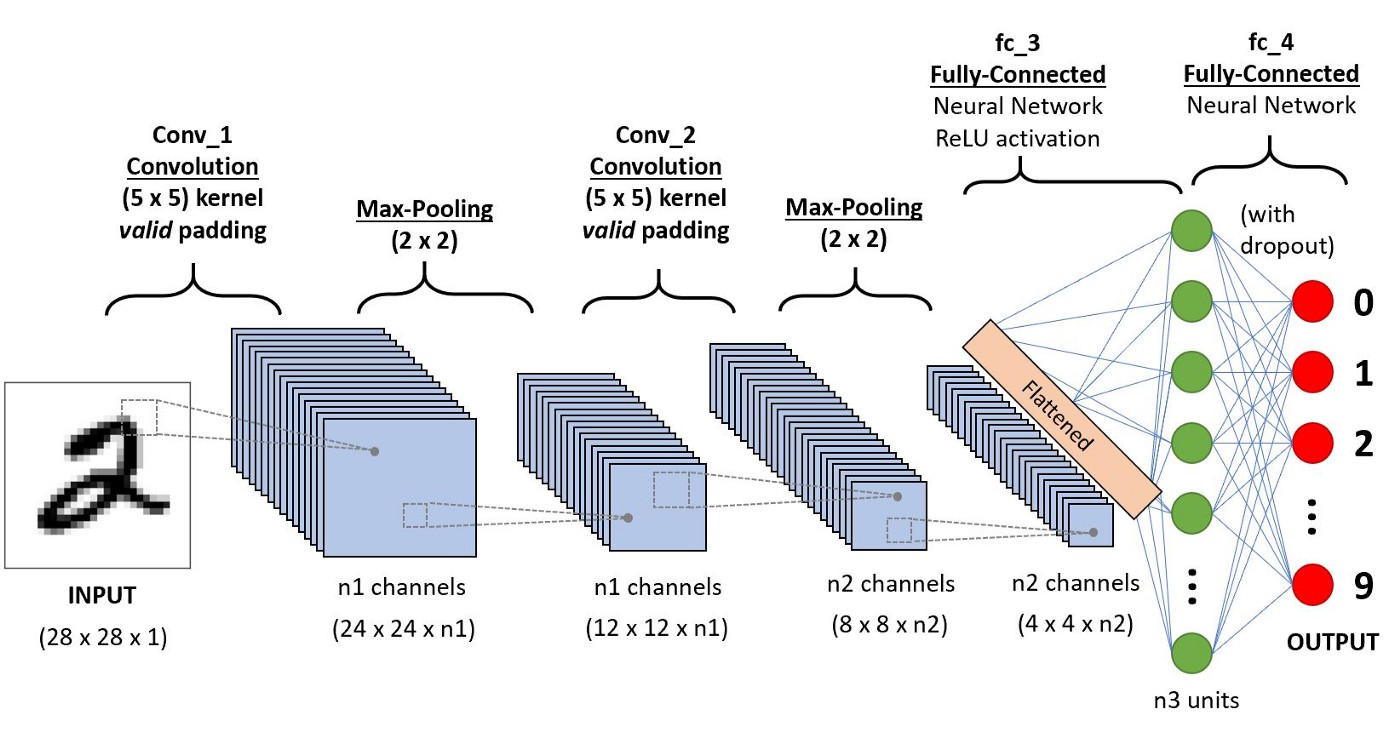

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from IPython.display import HTML

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

In [3]:
rd= tf.keras .preprocessing.image_dataset_from_directory('Data')

Found 119 files belonging to 3 classes.


In [4]:
class_name= rd.class_names
class_name

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [5]:
for image_batch, labels_batch in rd.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 2 1 0 0 2 2 1 0 2 1 1 2 2 0 1 0 0 0 1 2 2 1 2 0 0 0 0 2 2 0 0]


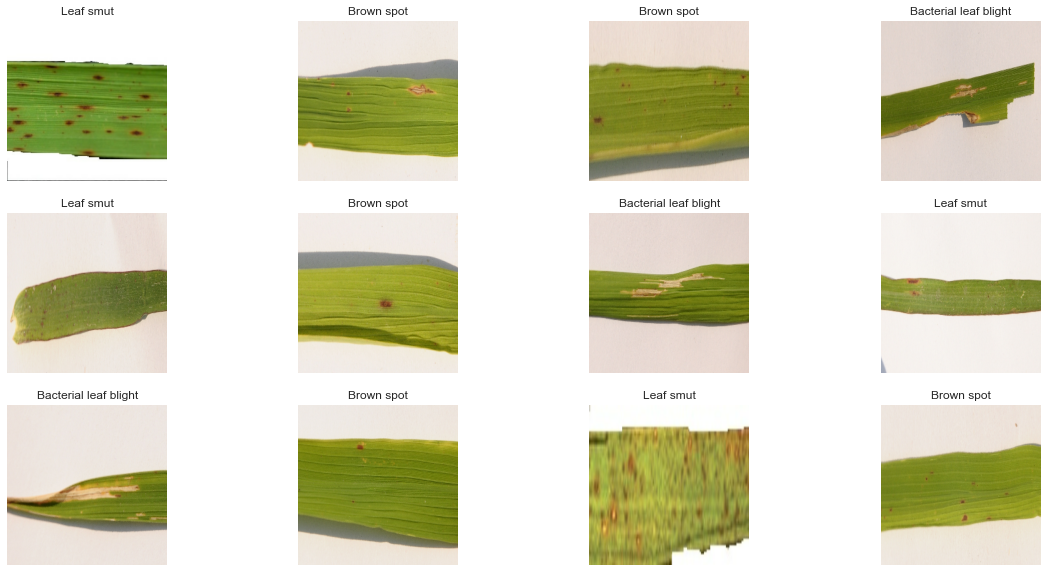

In [6]:
plt.figure(figsize=(20, 10))
for image_batch, labels_batch in rd.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[labels_batch[i]])
        plt.axis("off")

In [7]:
def get_rd_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [8]:
train_ds, val_ds, test_ds = get_rd_partitions_tf(rd)

In [9]:
resize_and_rescale = tf.keras.Sequential([layers.experimental.preprocessing.Resizing(256,256),
                                          layers.experimental.preprocessing.Rescaling(1./255)])


# Data Augmentation

In [10]:
data_augmentation = tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                                         layers.experimental.preprocessing.RandomRotation(0.2)])

In [11]:
input_shape = (30, 224,224, 3)        # Batch size=3, Image size=224,224, Channels=3
n_classes = 3

rd_model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

rd_model.build(input_shape=input_shape)

In [12]:
rd_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (30, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (30, 254, 254, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (30, 127, 127, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (30, 125, 125, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (30, 62, 62, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (30, 60, 60, 128)        

# Compiling the model

In [13]:
rd_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history = rd_model.fit(
    train_ds,
    batch_size=30,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
3/3 [==============================] - 6s 2s/step - loss: 2.0236 - accuracy: 0.3448
Epoch 2/50
3/3 [==============================] - 6s 2s/step - loss: 1.1213 - accuracy: 0.3793
Epoch 3/50
3/3 [==============================] - 6s 2s/step - loss: 1.1209 - accuracy: 0.3854
Epoch 4/50
3/3 [==============================] - 6s 2s/step - loss: 1.1001 - accuracy: 0.3218
Epoch 5/50
3/3 [==============================] - 6s 2s/step - loss: 1.0661 - accuracy: 0.4023
Epoch 6/50
3/3 [==============================] - 6s 2s/step - loss: 1.0032 - accuracy: 0.4598
Epoch 7/50
3/3 [==============================] - 6s 2s/step - loss: 0.9291 - accuracy: 0.5747
Epoch 8/50
3/3 [==============================] - 6s 2s/step - loss: 0.9929 - accuracy: 0.3678
Epoch 9/50
3/3 [==============================] - 5s 2s/step - loss: 0.8384 - accuracy: 0.5632
Epoch 10/50
3/3 [==============================] - 5s 2s/step - loss: 0.9242 - accuracy: 0.5632
Epoch 11/50
3/3 [==============================] 

In [15]:
train_score= rd_model.evaluate(train_ds)

3/3 [==============================] - 2s 459ms/step - loss: 0.0110 - accuracy: 1.0000


In [16]:
test_score= rd_model.evaluate(test_ds)

1/1 [==============================] - 1s 652ms/step - loss: 0.0048 - accuracy: 1.0000


**Since the accuracy score of both test and train data is 100%, we can say that our model is overfitting** 

# We are now going to use <span style='color:red'>'Dropout Function'</span> as our model is overfitted 

In [17]:
input_shape = (30, 224, 224, 3)
n_classes = 3

rd_model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

rd_model.build(input_shape=input_shape)

In [18]:
rd_model.compile(
                 optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy']
                )

In [19]:
history = rd_model.fit(
    train_ds,
    batch_size=30,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
3/3 [==============================] - 8s 2s/step - loss: 5.2913 - accuracy: 0.3563
Epoch 2/50
3/3 [==============================] - 8s 3s/step - loss: 1.2411 - accuracy: 0.3542
Epoch 3/50
3/3 [==============================] - 8s 3s/step - loss: 1.0954 - accuracy: 0.3542
Epoch 4/50
3/3 [==============================] - 7s 3s/step - loss: 1.0995 - accuracy: 0.3793
Epoch 5/50
3/3 [==============================] - 8s 2s/step - loss: 1.0867 - accuracy: 0.4138
Epoch 6/50
3/3 [==============================] - 7s 2s/step - loss: 1.1186 - accuracy: 0.3908
Epoch 7/50
3/3 [==============================] - 8s 3s/step - loss: 1.1001 - accuracy: 0.3333
Epoch 8/50
3/3 [==============================] - 7s 2s/step - loss: 1.0909 - accuracy: 0.4253
Epoch 9/50
3/3 [==============================] - 8s 2s/step - loss: 1.0790 - accuracy: 0.3908
Epoch 10/50
3/3 [==============================] - 7s 2s/step - loss: 1.0567 - accuracy: 0.3908
Epoch 11/50
3/3 [==============================] 

In [20]:
train_scores= rd_model.evaluate(train_ds)

3/3 [==============================] - 2s 493ms/step - loss: 0.3343 - accuracy: 0.8966


In [21]:
test_score= rd_model.evaluate(test_ds)

1/1 [==============================] - 1s 592ms/step - loss: 0.3793 - accuracy: 0.8696


# As we can see we get ~87% accuracy on test dataset, that means the 'dropout' function helps in eliminating overfitting.

# Plotting Accuracy and loss curve.

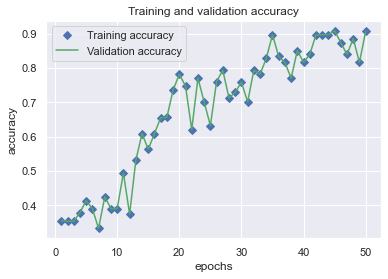

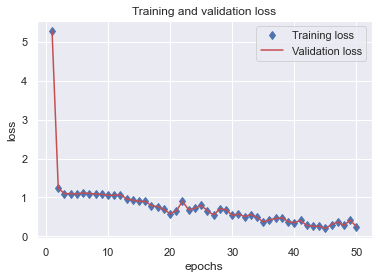

In [22]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["accuracy"]
loss = history.history["loss"]
val_loss = history.history["loss"]
epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, accuracy, "D", label="Training accuracy")
plt.plot(epochs, val_accuracy, "g", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()


plt.plot(epochs, loss, "d", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# Now checking our prediction on some sample images.

In [23]:
def predict(rd_model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = rd_model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 39ms/step


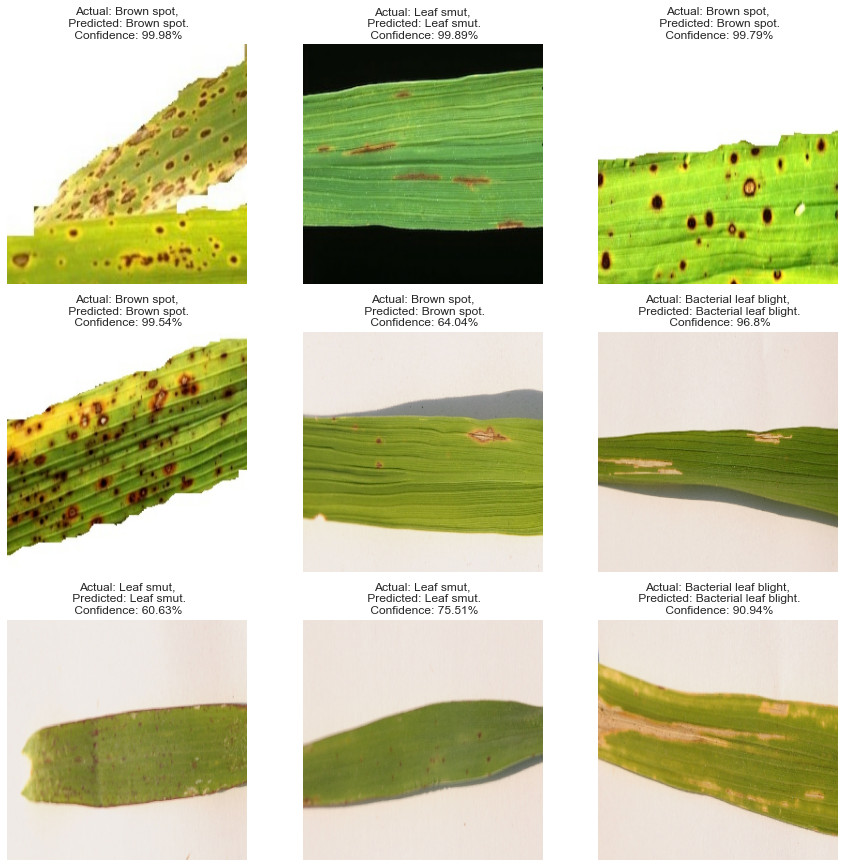

In [24]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(rd_model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

# Conclusion

Three different classifications of rice leaf diseases were studied and compared with the healthy rice leaf using the convolutional neural 
network. Using 119 images as training data and different image pre-processing techniques, we were able to identify what type of disease. 

Diving deeper, we can accurately classify a healthy leaf as healthy which would aid the farmers save resources by not treating the already 
healthy plants.